Titanic suvival prediction using decesion tree

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, pydotplus

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.cross_validation import cross_val_score
from sklearn import tree, metrics, model_selection, preprocessing


In [129]:


train_df = pd.read_csv("train.csv")


In [130]:
train_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
#Cleaning train data

# Fill the missing value in "Age".
train_df["age"] = train_df["age"].fillna(train_df["age"].median())


# "Sex" Coulumn has male/feamle as value. We can use LabelEncoder
# to convert these to int. male:1,female:0
lb = LabelEncoder()
train_df['sex'] = lb.fit_transform(train_df['sex']) 





# Converting the Embarked Column
train_df["embarked"] = train_df["embarked"].fillna("S")
train_df.loc[train_df["embarked"] == "S", "embarked"] = 0
train_df.loc[train_df["embarked"] == "C", "embarked"] = 1
train_df.loc[train_df["embarked"] == "Q", "embarked"] = 2



In [132]:
train_df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [133]:
train_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


You use only Pclass, Sex, Age, Sibsp (Siblings aboard), Parch (Parents/children aboard), 
and Fare to predict whether a passenger survived. 

In [134]:
# Set the target column to Survived
targets = train_df.survived

In [135]:
#Dropping unwanted columns. Also, removing the target column.
train_df = train_df.drop(['name', 'ticket', 'cabin', 'survived'], axis=1)
train_df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [136]:
# Let's get the total number of missing values in both datasets.
print("*****In the train set*****")
print(train_df.isna().sum())
print("\n")


*****In the train set*****
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64




In [137]:
# #Imputer is used to fill all the occurances of NaN with mean of that column.
# im = Imputer()
# predictors = im.fit_transform(train_df)

In [138]:
#Using Decision Tree Classifier
# classifier=DecisionTreeClassifier()
# classifier=classifier.fit(predictors,targets)
# print (classifier)

In [139]:
# lets split the train_df and do a validation
X_train, X_test, y_train, y_test = train_test_split(train_df, targets, test_size=0.3, random_state=0)

# pred_train, pred_validation, tar_train, tar_validation  =   train_test_split(predictors, targets, test_size=.4)
print("Validation test....")
dt_classifier=DecisionTreeClassifier()
dt_classifier=dt_classifier.fit(X_train, y_train)


Validation test....


In [140]:
# use the model to make predictions with the test data
y_pred = dt_classifier.predict(X_test)

In [141]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 58
Accuracy: 0.78


In [142]:
# validations=dt_classifier.predict(pred_validation)
# print("Accuracy... "+str(sklearn.metrics.accuracy_score(tar_validation, validations)))

In [143]:
#model evalutaion using CV
#evaluate the model using 10 fold CV
scores = cross_val_score(DecisionTreeClassifier(),train_df,targets, scoring = 'accuracy', cv = 10)
scores, scores.mean()

(array([0.71111111, 0.77777778, 0.70786517, 0.78651685, 0.83146067,
        0.76404494, 0.82022472, 0.78651685, 0.85393258, 0.79545455]),
 0.7834905232096243)

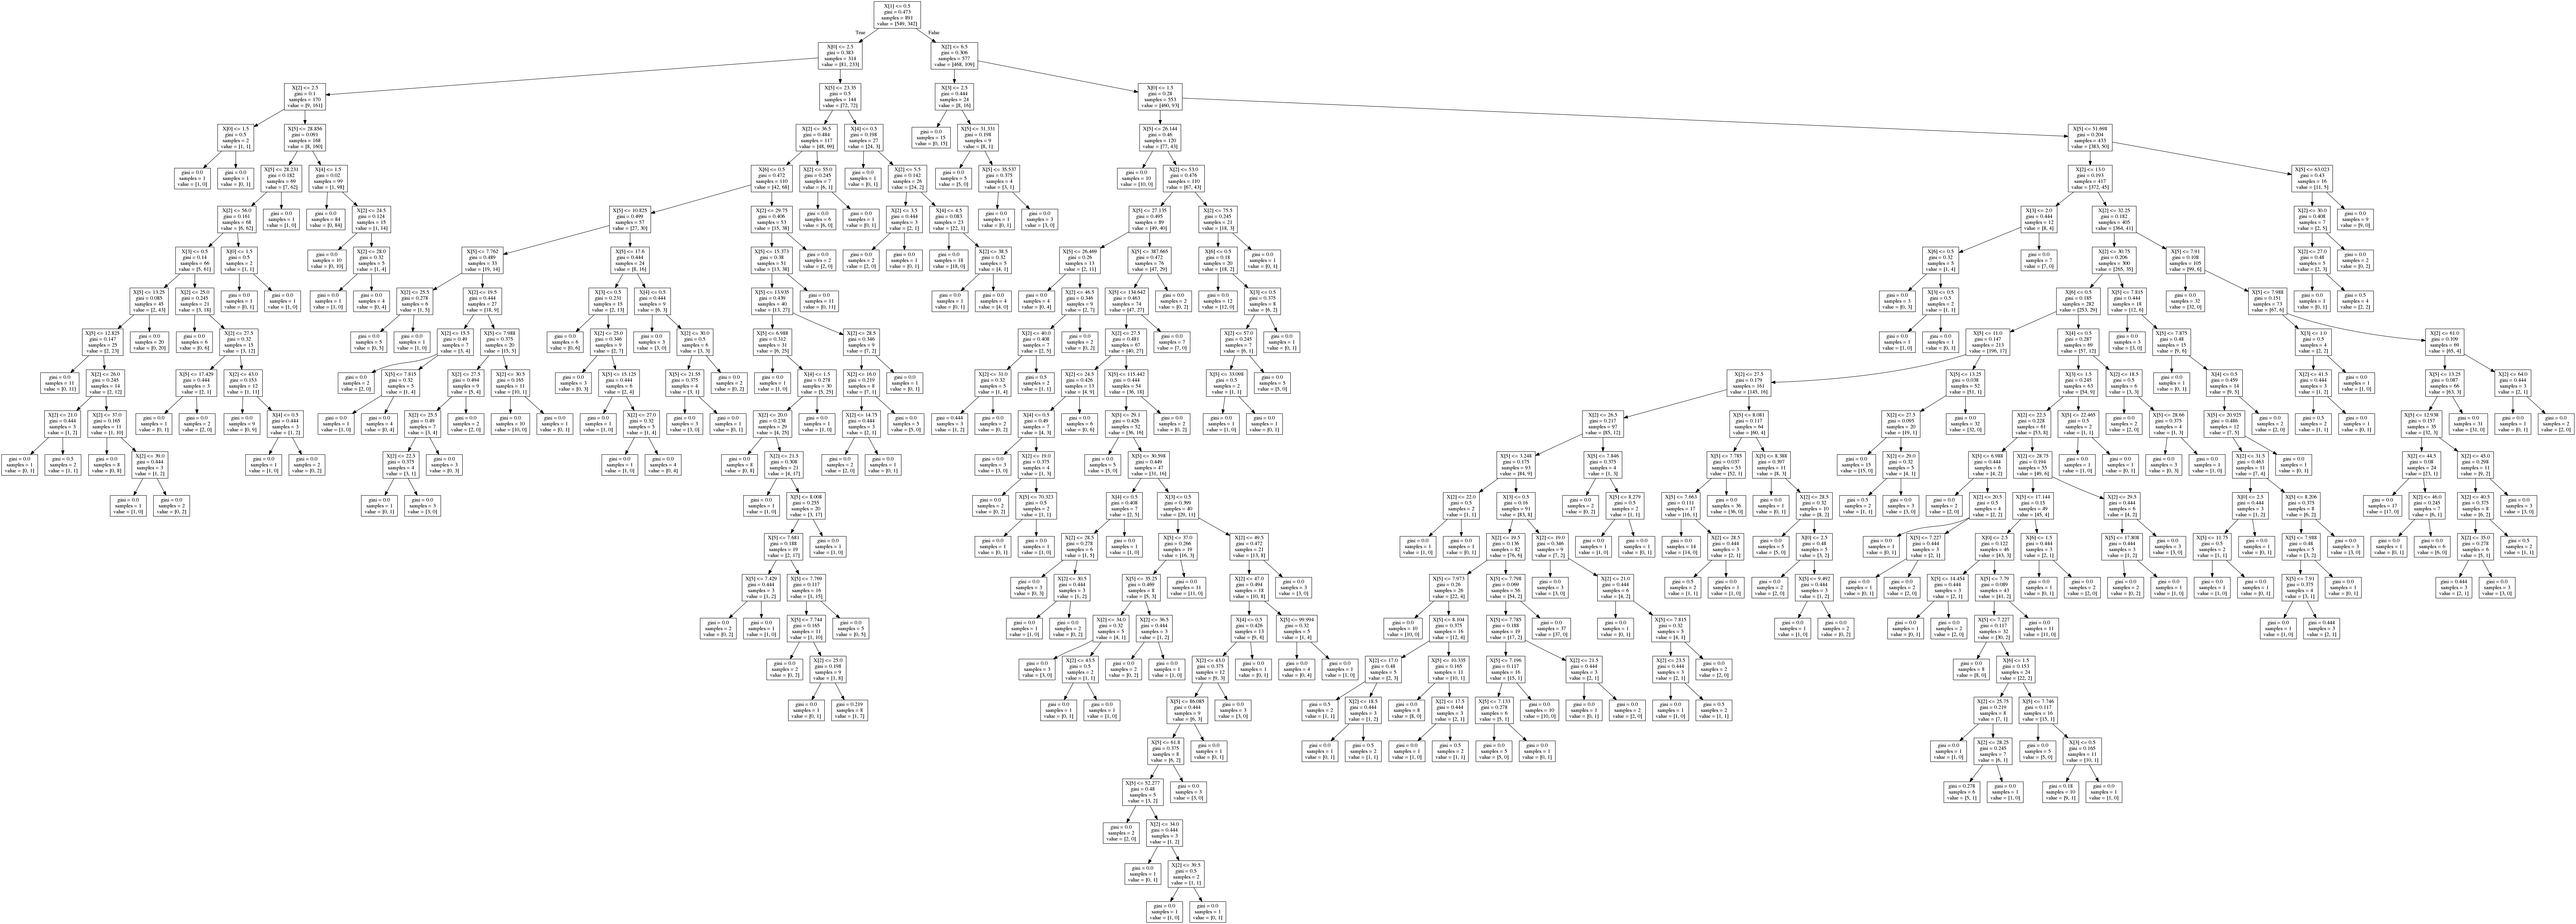

In [144]:
#Generating decision tree 
from sklearn import tree
from io import StringIO
from IPython.display import Image, display
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
display(Image(graph.create_png()))